<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/TENSORFLOW/blob/main/Neural_Network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [ ]:
x,y =make_circles(n_samples=1000,noise=0.03, random_state=21)


In [ ]:
x[0:10],y[0:10]

(array([[ 1.00783787, -0.13224763],
        [ 0.07620797, -1.01482893],
        [-0.17014712, -0.78291748],
        [-0.40372338, -0.69918955],
        [ 0.21830748,  0.77590142],
        [-0.77085844,  0.40906511],
        [ 0.03513904,  1.02370066],
        [-0.85276655, -0.47412175],
        [ 0.62496724,  0.46043368],
        [-0.51689096,  0.84644428]]), array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0]))

In [ ]:
circles=pd.DataFrame({
                      "x0(zero axis)":x[:,0],
                      "x1 (fi5rst axis)":x[:,1],
                      "label":y })
circles

,x0(zero axis),x1 (fi5rst axis),label
0,1.007838,-0.132248,0
1,0.076208,-1.014829,0
2,-0.170147,-0.782917,1
3,-0.403723,-0.699190,1
4,0.218307,0.775901,1
...,...,...,...
995,0.852730,0.575754,0
996,-0.777335,-0.213154,1
997,-0.461134,-0.601766,1
998,-0.881914,0.531148,0


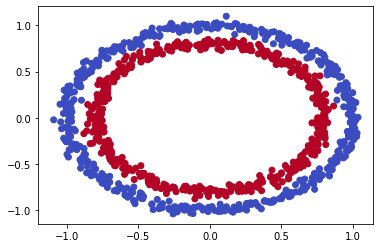

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm);

# perimaeter  matplotlib.cm.get_cmap(where cmap is color combination) 

In [ ]:
# steps in the modelling:

tf.random.set_seed(42)
model_1=tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation=None, input_shape=(None, 1)),
                             tf.keras.layers.Dense(1) ])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 2.2347 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7277 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7045 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.4645
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4884
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4949
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4838
Epoch 11/

In [ ]:
model_1.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5008


[0.6932001113891602, 0.5008124709129333]

In [ ]:
#Visualizing the data 
def plot_decision_boundary():
    ##Defining the boundries:
    x_min,x_max= x[:,0].min() -0.1, x[:,0].max()+0.1
    y_min,y_max= x[:,1].min() -0.1, x[:,1].max()+0.1

    ## meshgrid:
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max))
    x_in=np.c_[xx.ravel(),yy.ravel()]## function returns the flattened underlying data as an ndarray. Example 
                              #1: Use Series. ravel() function to return the elements of the given Series object as an ndarray.

    ##make predictions:
    y_preds=model_1.predict(x_in)          
    
    ## check for multiclass

    if len(y_preds[0])>1:
        print("Doing multiclass classification")
        y_preds=np.argmax(y_preds,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_preds=np.round(y_preds).reshape(xx.shape)

##plot decision boundary:
    plt.contourf(xx,yy,y_preds,cmap=plt.cm.RdYlGn,alpha=0.7)
    plt.scatter(x[:,0],x[:,1],c=y ,s=40, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

  


Doing multiclass classification


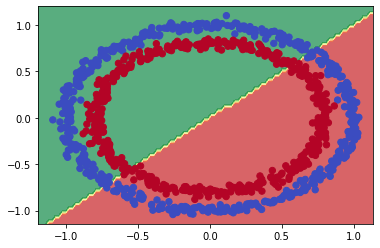

In [ ]:
plot_decision_boundary() 

## Since, the model is unable to predict the data. So, we try different hyper_parameters.

In [ ]:
## creating model,compiling the model , fitting the model:

model_2= tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation=tf.keras.activations.relu,input_shape=(None,1)),
                               tf.keras.layers.Dense(1)])
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
)
#model_2.fit(x,y,epochs=100)

In [ ]:
#model_2.evaluate(x,y)

Creating another model  model:

In [ ]:
model_3= tf.keras.Sequential([
                              tf.keras.layers.Dense(7, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(7, activation=tf.keras.activations.sigmoid),
                              tf.keras.layers.Dense(1 ,input_shape=(None,1))
                             ])

model_3.compile( loss=tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam())
 
model_3.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_4= tf.keras.Sequential([
                              tf.keras.layers.Dense(7, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(7,activation=tf.keras.activations.sigmoid),
                              tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
                             
                             ])

model_4.compile( loss=tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam())
 
model_4.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 8ms/step - loss: 0.7146 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7036 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6982 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6957 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6943 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.4980
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6917 - accuracy: 0.5050
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5060
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5170
Epoch 11/

In [ ]:
model_4.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.4396 - accuracy: 0.9780


[0.4396307170391083, 0.9779999852180481]

In [ ]:
## defining the boundries of the plot and create meshgrid:
def plot_dec_boundary():
    X_min,X_max= x[:,0].min(),x[:,0].max()
    Y_min,Y_max= x[:,1].min(),x[:,1].max()

    xx,yy=np.meshgrid(np.linspace(X_min,X_max,100),
                      np.linspace(Y_min,Y_max,100))
    
    x_in=np.c_[xx.ravel(),yy.ravel()]
    y_preds=model_4.predict(x_in)
    
    if len(y_preds[0])<1:
        print("Doing multiclass classification")
        y_preds=np.argmax(y_preds,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_preds=np.round(y_preds).reshape(xx.shape)
    plt.contourf(xx,yy,y_preds,cmap=plt.cm.coolwarm)
    plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlGn)
    


doing binary classification


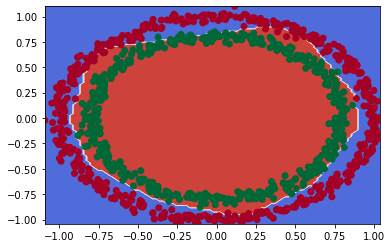

In [ ]:
plot_dec_boundary()

## ACTIVATION VISUALIZATIONS:


In [ ]:
a= tf.cast(tf.range(-10,10),tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
## Sigmoid 1/(1+exponential(-x))

def sigmoid(x):
    return 1 / (1 + tf.exp(-x))
    
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

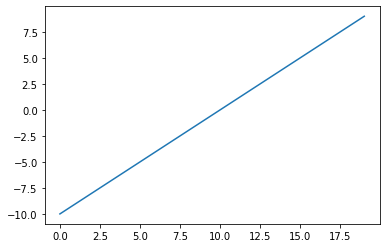

In [ ]:
plt.plot(a); # linear(tf.keras.aactivation.linear)

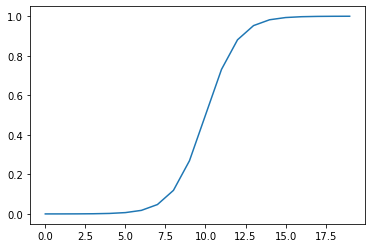

In [ ]:
plt.plot(sigmoid(a));

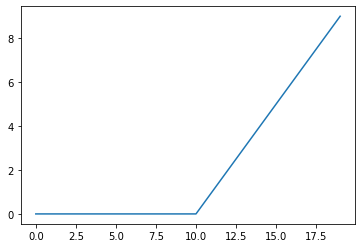

In [ ]:
relu=tf.maximum(0,a) # relu function :max(0,x)
plt.plot(relu);

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_4.evaluate(x, y)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

32/32 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.9780
Model loss on test set: 0.4396307170391083
Model accuracy on test set: 97.80%


In [ ]:
x

array([[ 1.00783787, -0.13224763],
       [ 0.07620797, -1.01482893],
       [-0.17014712, -0.78291748],
       ...,
       [-0.4611339 , -0.6017658 ],
       [-0.88191379,  0.53114753],
       [ 0.74197209, -0.28193104]])

## creating the model on train and test data set


In [ ]:
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
x[0],len(x),y[:10],len(y)

(array([ 1.00783787, -0.13224763]),
 1000,
 array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0]),
 1000)

In [ ]:
from sklearn.model_selection import train_test_split

## spliting the training and test data:
x_train,x_test=x[:800],x[800:]
y_train,y_test=y[:800],y[800:]


# Check the shapes of the data
x_train.shape, x_test.shape,y_test.shape,y_train.shape # 

((800, 2), (200, 2), (200,), (800,))

In [ ]:
##creating the model

model_5=tf.keras.Sequential([tf.keras.layers.Dense(7, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(7,activation=tf.keras.activations.sigmoid),
                              tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)])
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history=model_5.fit(x_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6967 - accuracy: 0.5038
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5537
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5825
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5663
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.6712
Epoch 6/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6583 - accuracy: 0.7287
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.7962
Epoch 8/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6269 - accuracy: 0.7100
Epoch 9/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6065 - accuracy: 0.6787
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5831 - accuracy: 0.8238
Epoch 11/25
25/25 [

In [ ]:
model_5.evaluate(x_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0718 - accuracy: 0.9900


[0.07175038009881973, 0.9900000095367432]

In [ ]:
def boundary_decision(a,b,model):
    x_min,x_max= x[:,0].min(),x[:,0].max()
    y_min,y_max= x[:,1].min(),x[:,1].max()

    X,Y=np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
    
    x_in=np.c_[X.ravel(),Y.ravel()]
    y_preds=model.predict(x_in)
    y_preds=np.round(y_preds).reshape(X.shape)
    plt.contourf(X,Y,y_preds,cmap=plt.cm.coolwarm)
    plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlGn)

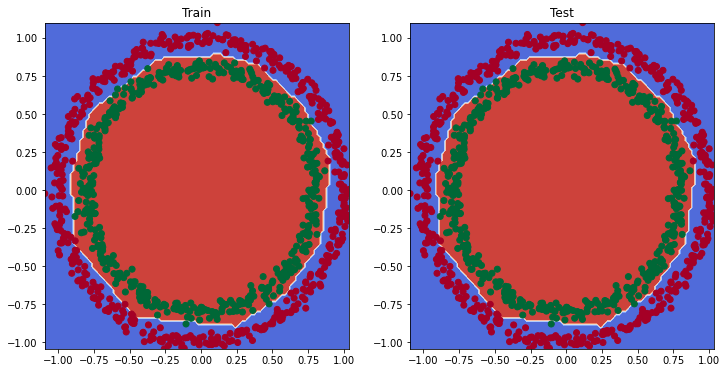

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
boundary_decision(model=model_5, a=x_train, b=y_train)
plt.subplot(1, 2,2)
plt.title("Test")
boundary_decision(model=model_5, a=x_test, b=y_test)
plt.show()

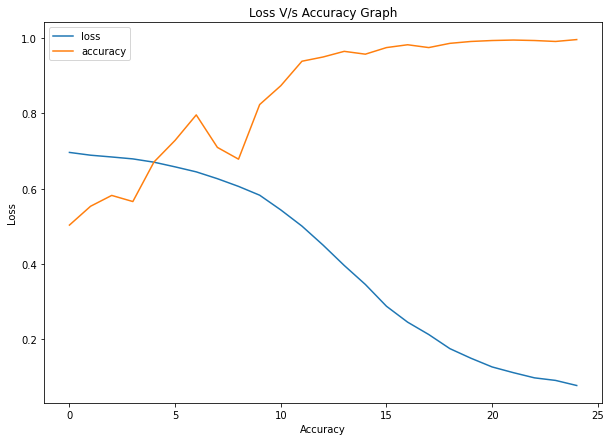

In [ ]:
pd.DataFrame(history.history),pd.DataFrame(history.history).plot(figsize=(10,7),title="Loss V/s Accuracy Graph",xlabel="Accuracy",ylabel="Loss");


## learning Graph:
lr=1e-4(10**(epoch/20)

In [ ]:
##creating the model with callback function

model_6 =tf.keras.Sequential([tf.keras.layers.Dense(7, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(7,activation=tf.keras.activations.sigmoid),
                              tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)])
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                   metrics=["accuracy"])

# Create a learning rate scheduler callback
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch           
#lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*(10**(epoch/20)))


In [ ]:
history = model_6.fit(x_train, 
                      y_train, 
                      epochs=20,)
                      #callbacks=[lr_scheduler])

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.7023 - accuracy: 0.4800
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6300
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.7275
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.7425
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.8675
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.8863
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4447 - accuracy: 0.9463
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.9675
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2792 - accuracy: 0.9775
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9825
Epoch 11/20
25/25 [

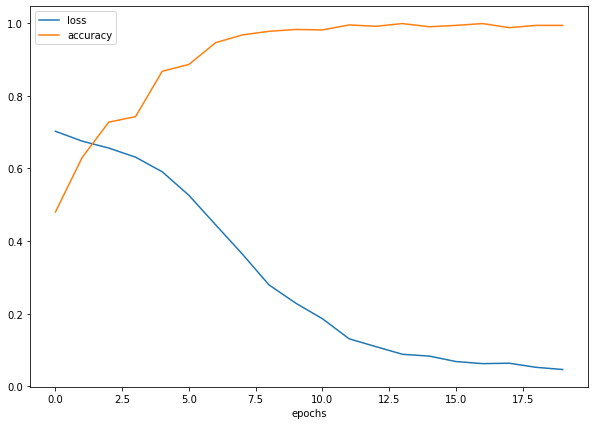

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

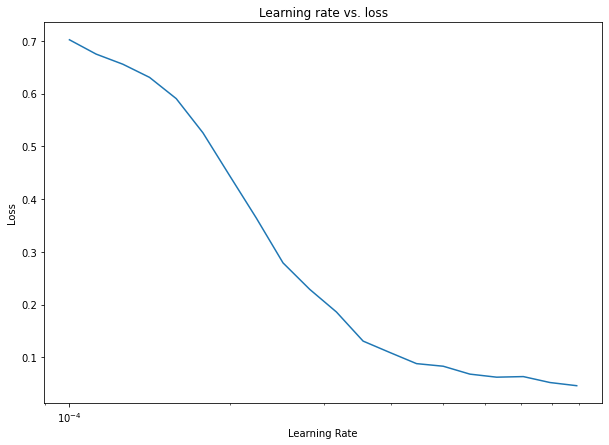

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(20)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

**Ideal Learninig rate is 0.02 as per graph shown above,this is the point where the graph shown lowest point and from here graph shows continous learning **

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_preds=model_6.predict(x_test)
pd.DataFrame(y_preds)

,0
0,0.026309
1,0.037554
2,0.005866
3,0.032149
4,0.960512
...,...
195,0.004526
196,0.997476
197,0.999683
198,0.012622


In [ ]:
#confusion_matrix(y_preds,y_test)## shows error

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_6.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9900
Model loss on test set: 0.045935168862342834
Model accuracy on test set: 99.00%


In [ ]:
y_pre=np.round(y_preds)
pd.DataFrame(y_pre)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
195,0.0
196,1.0
197,1.0
198,0.0


In [ ]:
#creating Confusion matrix
cm=confusion_matrix(y_test,np.round(y_preds))
cm

array([[101,   1],
       [  1,  97]])

In [ ]:
#Normalising the data:
cm_normal=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
cm_normal

array([[0.99019608, 0.00980392],
       [0.01020408, 0.98979592]])

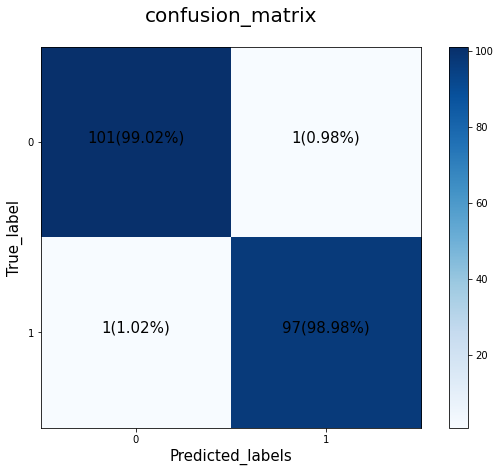

In [ ]:
## ploting the matrix 
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

fig,ax=plt.subplots(figsize=(10,7))    # creating  plot axis
cax=ax.matshow(cm,cmap=plt.cm.Blues)  # shows the figure
fig.colorbar(cax);                      # indication bar


# creat class
labels=np.arange(cm.shape[0])
classes=False
if classes:
    labels=classes
else:
    labels



#labeling the axes:

ax.set(title="confusion_matrix",xlabel="Predicted_labels",ylabel="True_label",
        xticks=labels,yticks=labels , xticklabels=labels,yticklabels=labels)


# mordification in x axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

## adjusting label size:

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.title.set_size(20)



threshold=cm.max()+cm.min()/2           #threshold for different color

#text plot
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]}({cm_normal[i,j]*100:.2f}%)',
    horizontalalignment="center",
    color='white' if cm[i,j]>threshold else "black",
    size=15,family='classic-roman')
             
             

In [ ]:
cm[0,0]>threshold,cm[0,1]>threshold,cm[1,1]>threshold,cm[1,0]>threshold

(False, False, False, False)

In [ ]:
cm[0,0],cm[0,1],cm[1,1],cm[1,0],threshold

(101, 1, 97, 1, 101.5)